## Project Overview

In this project, I do a supervised classification problem with 5,899 rows of labeled data, and my job is to create a model that can predict the correct output label.

## Project Outline

Part 1: Data Exploration
> Part 1.1: Understand Raw Dataset
<br>Part 1.2: Data Cleaning
<br>Part 1.3: Exploratory Data Analysis

Part 2: Feature Enigeering
> Part 2.1: One-hot-encoding
<br>Part 2.2: Time Related Features
<br>Part 2.3: Text Feature Engineering
<br>Part 2.4: Deal With Imbalanced Data

Part 3: Building Models
> Part 3.1: Explore Models
<br>Part 3.2: Model Evaluation

Part 4: Summary
    

## Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix, precision_score,recall_score

In [4]:
df = pd.read_csv('Challenge_Data.csv')

In [5]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,ClassificationLabel
0,Word1 Word2 Word3 Word4 Word5,44912133,"3,575.00",Word771 Word772,8/31/2018,Word560 Word561 Word366 Word562,Doc1,Category_1
1,Word6 Word7,10719,"1,092.50",Word711 Word773 Word774,8/31/2018,Word563 Word366 Word562,NoDoc,Category_2
2,Word8 Word9 Word10 Word11 Word5,4.80Z+11,75,Word775 Word776,10/31/2018,Word563 Word564 Word9 Word26,NoDoc,Category_1
3,Word12 Word13 Word7,10731,"30,980.00",Word777 Word45 Word160 Word45 Word778,1/1/2018,Word565 Word566,NoDoc,Category_1
4,Word8 Word9 Word10 Word11 Word5,4.80F+11,"3,766.80",Word779 Word258 Word780,1/1/2018,Word567 Word568 Word569 Word570,Doc1,Category_1


In [6]:
df.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,ClassificationLabel
count,5899,5899,5899,5746,5899,5899,5899,5899
unique,313,4818,2397,2032,17,196,4,11
top,Word16 Word17 Word18 Word7,201811-00046,"2,520.00",Word61,10/31/2018,Word563 Word564 Word9 Word26,NoDoc,Category_1
freq,1245,59,82,220,651,2165,4635,5204


### Part 1.2: Data Cleaning

#### Handle data type error

In [7]:
# date format
df['Col5'] = pd.to_datetime(df['Col5'])

In [8]:
# number values: string->float
def clean_type(value): 
    if type(value) == type("str"):
        value=float(value.replace(",",""))
    return value

In [9]:
for data in [df]:
    data['Col3']=data['Col3'].apply(clean_type)

#### Handle data formatting error

In [10]:
# classification label is not integrited and well formatted
uniques = df['ClassificationLabel'].unique()
print(uniques)

['Category_1' 'Category_2' 'Category_3' 'Categry_6' 'Category4'
 'Category_6' 'Category 5' 'category_1' 'Category 3' 'Category2'
 'Category _3']


In [11]:
def clean_label(label):
    c_list = label[:]
    label = c_list[-1]
    return label

In [12]:
for data in [df]:
    data['ClassificationLabel']=data['ClassificationLabel'].apply(clean_label)

In [13]:
df = df.fillna(" ")

#### Drop irrelavant feature

In [14]:
# Col2 has different values of numbers and characters, it seems to be ID or other identifier/description 
df.drop(['Col2'],axis=1,inplace=True)

### Part 1.3: Exploratory Data Analysis

#### Class distribution

In [15]:
from collections import Counter
# look at the number of each class
print(Counter(df['ClassificationLabel']))

Counter({'1': 5215, '2': 631, '3': 23, '4': 16, '6': 12, '5': 2})


We have very imbalanced classes, so we need to deal with this problem in feature engineering and modeling.

#### Word cloud visualization

In [16]:
from wordcloud import WordCloud,ImageColorGenerator

def wordCloud(col,num):
    words =""
    for data in col:
        w = data.split()
        for elem in w:
            words+=elem
            words+=" "
                
    cloud = WordCloud(
            max_words=50,
            max_font_size=100,
            width=1000,
            height=500
        )
    word_cloud = cloud.generate(words)
    name = "pic"+str(num)+".jpg"
    word_cloud.to_file(name)
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()

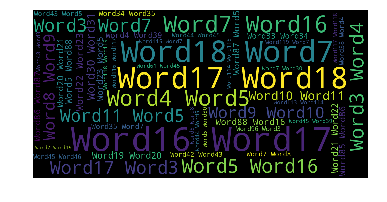

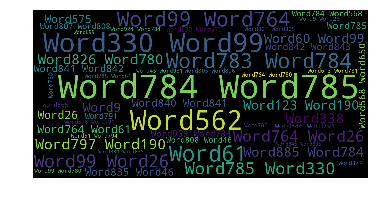

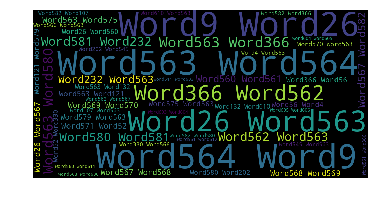

In [17]:
wordCloud(df['Col1'],1)
wordCloud(df['Col4'],2)
wordCloud(df['Col6'],3)

#### Word count distribution

In [18]:
#Word count
df_word = df.copy()
df_word['Col1_count']=df["Col1"].apply(lambda x: len(str(x).split()))
df_word['Col4_count']=df["Col4"].apply(lambda x: len(str(x).split()))
df_word['Col6_count']=df["Col6"].apply(lambda x: len(str(x).split()))

#Unique word count
df_word['Col1_unique_count']=df["Col1"].apply(lambda x: len(set(str(x).split())))
df_word['Col4_unique_count']=df["Col4"].apply(lambda x: len(set(str(x).split())))
df_word['Col6_unique_count']=df["Col6"].apply(lambda x: len(set(str(x).split())))


In [19]:
df_word=pd.concat([df_word,df['Col7']],axis=1)
df_word.to_csv('clean_data.csv')

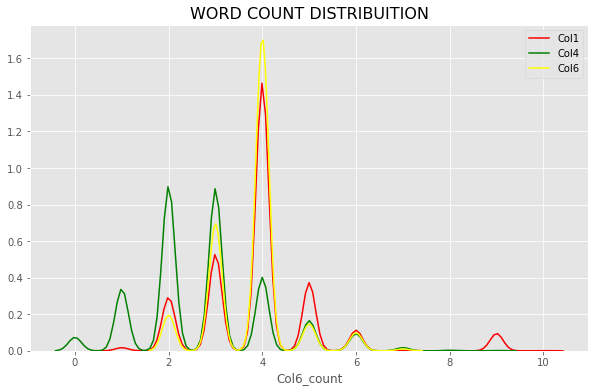

In [20]:
plt.figure(figsize = (10,6))

g1 = sns.distplot(df_word['Col1_count'], color='red',hist=False, label="Col1")
g1 = sns.distplot(df_word['Col4_count'], color='green',hist=False, label="Col4")
g1 = sns.distplot(df_word['Col6_count'],color='yellow',hist=False,label="Col6")
g1.set_title('WORD COUNT DISTRIBUITION', fontsize=16)
plt.legend()
plt.show()

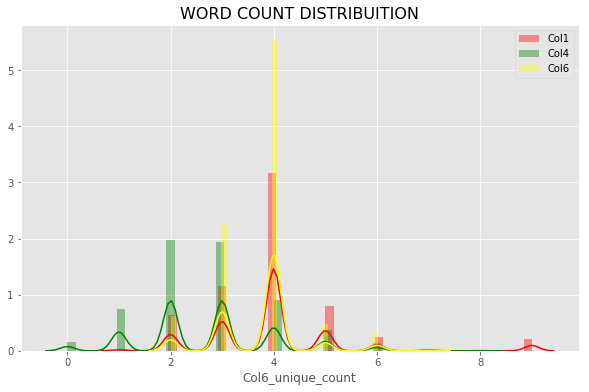

In [21]:
plt.figure(figsize = (10,6))

g1 = sns.distplot(df_word['Col1_unique_count'], color='red', label="Col1")
g1 = sns.distplot(df_word['Col4_unique_count'], color='green', label="Col4")
g1 = sns.distplot(df_word['Col6_unique_count'],color='yellow',label="Col6")
g1.set_title('WORD COUNT DISTRIBUITION', fontsize=16)
plt.legend()
plt.show()

## Part 2: Feature Engineering

### Part 2.1: one-hot-encoding

In [22]:
# one-hot-encoding to categorical feature Col7
doc = pd.get_dummies(df['Col7'])
df.drop(['Col7'],axis=1,inplace=True)
df = pd.concat([df, doc], axis=1)

### Part 2.2: Time Related Features

In [23]:
# divide time feature into year, month and day
df['year']=df['Col5'].dt.year
df['month']=df['Col5'].dt.month
df['day']=df['Col5'].dt.day
df.drop(columns=['Col5'],inplace=True)

In [24]:
df.head()

,Col1,Col3,Col4,Col6,ClassificationLabel,Doc1,Doc2,Doc3,NoDoc,year,month,day
0,Word1 Word2 Word3 Word4 Word5,3575.0,Word771 Word772,Word560 Word561 Word366 Word562,1,1,0,0,0,2018,8,31
1,Word6 Word7,1092.5,Word711 Word773 Word774,Word563 Word366 Word562,2,0,0,0,1,2018,8,31
2,Word8 Word9 Word10 Word11 Word5,75.0,Word775 Word776,Word563 Word564 Word9 Word26,1,0,0,0,1,2018,10,31
3,Word12 Word13 Word7,30980.0,Word777 Word45 Word160 Word45 Word778,Word565 Word566,1,0,0,0,1,2018,1,1
4,Word8 Word9 Word10 Word11 Word5,3766.8,Word779 Word258 Word780,Word567 Word568 Word569 Word570,1,1,0,0,0,2018,1,1


In [25]:
from sklearn.model_selection import train_test_split

# create training and testing vars: 90:10
y = df.ClassificationLabel
df_train = df.drop(['ClassificationLabel'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(5309, 11) (5309,)
(590, 11) (590,)


### Part 2.3: Text Feature Engineering

The simplest text vectorization technique is Bag Of Words (BOW), I'll use vectorization on text features Col1, Col4 and Col6.

In [26]:
# text data pre-processing
def clean_text(text):
    """
    Applies some pre-processing on the given text.

    Steps :
    - Lowering text
    """
    if pd.isnull(text):
        text = ""
    # convert text to lowercase
    text = text.strip().lower()
    
    # replace punctuation characters with spaces
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)

    return text

I choose CountVectorizer. CVec is going to count the number of times a word shows up within a document. 
TFIDF is going to compare the number of times a word appears within a document to how many documents that phrase appears in. Although normalization of tf-idf can be useful, in this case, binary occurrence markers are usually better than markers. I choose to do this with the CountVectorizer's binary parameter. In particular, some predictors such as Bernoulli Naive Bayes explicitly model discrete Boolean random variables. Very short text can also have a noise-filled tf-idf value, while binary occurrence info is more stable.

When I make a CountVectorizer, I fit AND transform on the X_train, and ONLY transform on the X_test.
In transforming, I change both of them to dataframes.

In [27]:
import scipy.sparse as sp
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

def vectorizer(x_train,x_test):
    vectorizer = CountVectorizer(preprocessor=clean_text).fit(x_train)
    train = pd.DataFrame(vectorizer.transform(x_train).todense(),columns=vectorizer.get_feature_names())
    test = pd.DataFrame(vectorizer.transform(x_test).todense(),columns=vectorizer.get_feature_names())
    return train,test

In [28]:
col1_train,col1_test = vectorizer(X_train['Col1'],X_test['Col1'])
col4_train,col4_test = vectorizer(X_train['Col4'],X_test['Col4'])
col6_train,col6_test = vectorizer(X_train['Col6'],X_test['Col6'])

In [29]:
X_train.reset_index(drop=True, inplace=True)
col1_train.reset_index(drop=True, inplace=True)
col4_train.reset_index(drop=True, inplace=True)
col6_train.reset_index(drop=True, inplace=True)

In [30]:
X_test.reset_index(drop=True, inplace=True)
col1_test.reset_index(drop=True, inplace=True)
col4_test.reset_index(drop=True, inplace=True)
col6_test.reset_index(drop=True, inplace=True)

In [31]:
#concat transformed text features with all other features
train = pd.concat([X_train,col1_train,col4_train,col6_train],axis=1)
train.drop(columns=['Col1','Col4','Col6'],inplace=True)

In [32]:
test = pd.concat([X_test,col1_test,col4_test,col6_test],axis=1)
test.drop(columns=['Col1','Col4','Col6'],inplace=True)

### Part 2.5 Deal With Imbalanced Classes

I use SMOTE method to oversample class values, and assign the sampling strategy as {'1':4700,'2':1000,'3':1000,'4':1000,'5':1000,'6':1000} (dict when multi-class problem)

In [33]:
from imblearn.over_sampling import SMOTE

df_train = train
df_train_y = y_train

print('Original dataset shape {}'.format(Counter(df_train_y)))

sampling_strategy = Counter({'1':4700,'2':1000,'3':1000,'4':1000,'5':1000,'6':1000})

sm = SMOTE(k_neighbors=1,sampling_strategy=sampling_strategy)
train, y_train = sm.fit_resample(df_train, df_train_y)

print('Resampled dataset shape {}'.format(Counter(y_train)))

Using TensorFlow backend.


Original dataset shape Counter({'1': 4695, '2': 566, '3': 20, '4': 16, '6': 10, '5': 2})


/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:253: UserWarning: After over-sampling, the number of samples (4700) in class 1 will be larger than the number of samples in the majority class (class #1 -> 4695)
  n_samples_majority))


Resampled dataset shape Counter({'1': 4700, '2': 1000, '3': 1000, '4': 1000, '6': 1000, '5': 1000})


## Part 3: Model Exploration

Decision tree is easy to implement and interpreted, while bagging and random forest usually has better performance when data is complicated. 

#### Decision Tree

In [34]:
dt = DecisionTreeClassifier(max_depth=10,max_features=1000,class_weight='balanced')
dt.fit(train,y_train)
y_pred = dt.predict(test)

# Evaluation
acc = accuracy_score(y_test, y_pred)

print("Accuracy on the dataset: {:.2f}".format(acc*100))

Accuracy on the dataset: 88.81


In [35]:
print('Classification report for Decision Tree')
print(classification_report(y_true=y_test, y_pred=y_pred))

Classification report for Decision Tree
              precision    recall  f1-score   support

           1       0.97      0.91      0.94       520
           2       0.50      0.78      0.61        65
           3       1.00      0.67      0.80         3
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         2

    accuracy                           0.89       590
   macro avg       0.49      0.47      0.47       590
weighted avg       0.91      0.89      0.90       590



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/m

#### Random Forest

In [36]:
rf = RandomForestClassifier(n_estimators=10, max_depth=15,class_weight='balanced')
rf.fit(train,y_train)
y_pred = rf.predict(test)

# Evaluation
acc = accuracy_score(y_test, y_pred)

print("Accuracy on the dataset: {:.2f}".format(acc*100))

Accuracy on the dataset: 90.85


In [37]:
print('Classification report for Random Forest')
print(classification_report(y_true=y_test, y_pred=y_pred))

Classification report for Random Forest
              precision    recall  f1-score   support

           1       0.98      0.92      0.95       520
           2       0.59      0.83      0.69        65
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         0
           6       0.50      0.50      0.50         2

    accuracy                           0.91       590
   macro avg       0.61      0.52      0.53       590
weighted avg       0.93      0.91      0.92       590



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### Bagging

In [38]:
bag = BaggingClassifier()
bag.fit(train, y_train)
y_pred = bag.predict(test)

# Evaluation
acc = accuracy_score(y_test, y_pred)

print("Accuracy on the IMDB dataset: {:.2f}".format(acc*100))

Accuracy on the IMDB dataset: 96.27


In [39]:
# Classification report
print('Classification report for Bagging')
print(classification_report(y_true=y_test, y_pred=y_pred))

Classification report for Bagging
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       520
           2       0.84      0.86      0.85        65
           3       1.00      1.00      1.00         3
           4       0.00      0.00      0.00         0
           6       1.00      0.50      0.67         2

    accuracy                           0.96       590
   macro avg       0.76      0.67      0.70       590
weighted avg       0.97      0.96      0.96       590



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Among all the models, bagging classifier has the highest accuracy.

## Part 4: Summary and Furture Work

In this project, I use tree models to build classifiers and get best performance using bagging classifier.

Future work:

we have text features only contain words not sentence, if in other projects with real sentences, I'll deal with stop words and try TF-IDF transformer.  

I'll also look at the feature importance and select fewer features.